## Assignment 1
### Stochastic Simulation

Team:
- Hazel
- Marcel
- Koen

In [3]:
import numpy as np
from scipy.stats import qmc
import matplotlib.pyplot as plt
from sympy import isprime

Define the function that let's us randomly sample in three different ways:
- Pure Random Sampling
- Latin Hypercube Sampling
- Orthogonal Sampling

In [5]:
def random_sample(n, x_range=(0,10), y_range=(0,10), sampler='pure_random_sampling'):
    if sampler == 'pure_random_sampling':
        # Generate random x and y coordinates within the specified range
        x_coords = np.random.uniform(x_range[0], x_range[1], n)
        y_coords = np.random.uniform(y_range[0], y_range[1], n)

        # Combine coordinates to form points
        points = np.stack((x_coords, y_coords), axis=-1)

    elif sampler == 'latin_hypercube_sampling':
        # Init HyperCube Sampling
        lhc = qmc.LatinHypercube(d=2, strength=1)

        # Generate random points and scale to range
        points = lhc.random(n)

        points[:, 0] = points[:, 0] * (x_range[1] - x_range[0]) + x_range[0]
        points[:, 1] = points[:, 1] * (y_range[1] - y_range[0]) + y_range[0]

    elif sampler == 'orthogonal_sampling':
        # Init Orthogonal Sampling
        lhc = qmc.LatinHypercube(d=2, strength=2)

        if not isprime(n):
            raise ValueError('n must be the square of a prime number!')

        # Generate random points and scale to range
        points = lhc.random(n)

        points[:, 0] = points[:, 0] * (x_range[1] - x_range[0]) + x_range[0]
        points[:, 1] = points[:, 1] * (y_range[1] - y_range[0]) + y_range[0]

    else:
        raise ValueError("No valid sampler is chosen.")

    return points

Create the functions that determine if a point is within the mandelbrot set, plot the set and calculate its area.

In [7]:
# Define a function that determines if a point falls into Mandelbrot
def mandelbrot(point, max_iter=1000):
    z=0
    for i in range(max_iter):
        z = z**2 + point
        if abs(z) > 2:
            return i
    return max_iter

In [8]:
def plot_mandelbrot(n=10000, x_range=(-2,1), y_range=(-1.5, 1.5), max_iter=1000, sampler='pure_random_sampling'):
    # Sample random points
    points = random_sample(n, x_range, y_range, sampler)
    complex_points = points[:, 0] + 1j * points[:, 1]

    # Calculate the iteration count for each point
    iterations = np.array([mandelbrot(point, max_iter) for point in complex_points])

    # Separate points inside the Mandelbrot set (max_iter) and escape points
    in_set = iterations == max_iter
    outside_set = ~in_set
    
    # Map iterations to colors
    colors = np.log(iterations + 1)
    
    # Plot points inside the Mandelbrot set in black
    plt.scatter(complex_points[in_set].real, complex_points[in_set].imag, color='black', s=0.5, marker='.')

    # Use a color gradient for points that escape
    plt.scatter(complex_points[outside_set].real, complex_points[outside_set].imag, 
                c=colors[outside_set], cmap='viridis', s=0.5, marker='.')

    # Add a color bar and other plot information
    plt.colorbar(label="Escape Time (log scale)")
    plt.xlim(x_range)
    plt.ylim(y_range)
    plt.title(f"Mandelbrot Set with {n} Points ({sampler})")
    plt.xlabel("Real")
    plt.ylabel("Imaginary")
    plt.show()

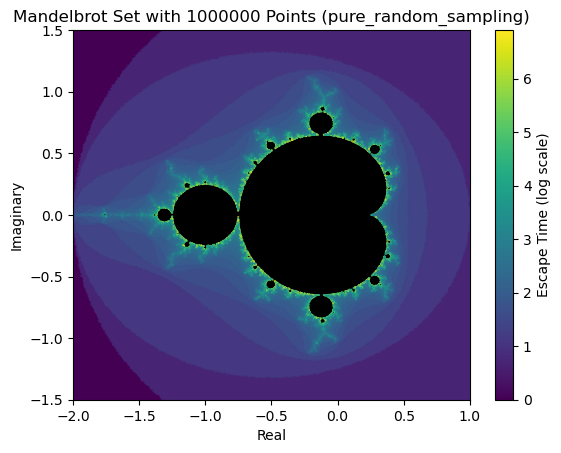

In [9]:
plot_mandelbrot(1000000, sampler='pure_random_sampling')

In [10]:
def monte_carlo_area(n=10000, x_range=(-2,1), y_range=(-1.5, 1.5), max_iter=1000, sampler='pure_random_sampling'):
    # Sample random points
    points = random_sample(n, x_range, y_range, sampler)
    complex_points = points[:, 0] + 1j * points[:, 1]

    # Calculate the iteration count for each point
    iterations = np.array([mandelbrot(point, max_iter) for point in complex_points])

    # Separate points inside the Mandelbrot set (max_iter) and escape points
    in_set = iterations == max_iter
    
    # Calculate the area based on the bounding box
    area = (x_range[1] - x_range[0]) * (y_range[1] - y_range[0]) * np.sum(in_set) / n 

    return float(area)

In [11]:
monte_carlo_area(n=1000000)

1.512036